In [125]:
# https://towardsdatascience.com/pandas-groupby-a-simple-but-detailed-tutorial-314b8f37005d
# https://towardsdatascience.com/accessing-data-in-a-multiindex-dataframe-in-pandas-569e8767201d
# https://towardsdatascience.com/summarizing-data-with-pandas-crosstab-efc8b9abecf
# https://towardsdatascience.com/how-to-flatten-multiindex-columns-and-rows-in-pandas-f5406c50e569
# https://datascientyst.com/list-aggregation-functions-aggfunc-groupby-pandas/
# https://stackoverflow.com/questions/25929319/how-to-iterate-over-pandas-multiindex-dataframe-using-index
# https://stackoverflow.com/questions/24495695/pandas-get-unique-multiindex-level-values-by-label
# https://stackoverflow.com/questions/55706391/pandas-crosstab-on-multiple-columns-then-groupby

# https://matplotlib.org/stable/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py

In [126]:
import sys
import pandas as pd
sys.path.append("C:/Users/ping/MyDrive/py_files/python/py379/")
from myUtils import pickle_load, pickle_dump
pd.set_option('max_colwidth', 12, 'display.max_columns', 18, 'display.width', 1200, 'display.max_rows', 100)
INPUT_DIR = 'C:/Users/ping/OneDrive/Documents/jenn_bb_sales'
path_pickle_dump = f'{INPUT_DIR}/'

In [127]:
df = pickle_load(path_pickle_dump, 'df_item_sale_n_weather_cleaned')
rows_org, cols_org = df.shape[0], df.shape[1]
print(f'df.shape: {df.shape}, rows: {rows_org}, columns: {cols_org}')
print(f'df.columns: {df.columns}')

df.shape: (18364, 23), rows: 18364, columns: 23
df.columns: Index(['Date', 'Time', 'Category', 'Item', 'Qty', 'Gross Sales', 'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Event Type', 'Dining Option', 'Customer Name', 'NAME', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02', 'WT08', 'DOW'], dtype='object')


In [128]:
df = df[df['Event Type'] != 'Refund']
df = df[df['Qty'] >= 0]
df = df.sort_values(['Date', 'Time'])
_rows_dropped, _cols_dropped = (rows_org - df.shape[0]), (cols_org - df.shape[1])
print(f'df.shape: {df.shape}, rows dropped from original: {_rows_dropped}, columns dropped from original: {_cols_dropped}')

df.shape: (18337, 23), rows dropped from original: 27, columns dropped from original: 0


In [129]:
ls_Date = df.Date.to_list()
Date_first, Date_last = ls_Date[0], ls_Date[-1]
print(f'first date: {Date_first}, last date: {Date_last}')
date_str = f' ({Date_first} to {Date_last})'
print(f'date_str: {date_str}')

first date: 2021-07-08, last date: 2022-09-04
date_str:  (2021-07-08 to 2022-09-04)


In [130]:
l_object, l_float, l_int64, l_error = [], [], [], []
for column in df.columns:
  if df[column].dtype == 'object':
    l_object.append(column)
  elif df[column].dtype == 'float':
    l_float.append(column)  
  elif df[column].dtype == 'int64':
    l_int64.append(column)
  else:   
    l_error.append(column)
print(f'columns with dtypes are object:\n{l_object}')
print(f'columns with dtypes are float:\n{l_float}')
print(f'columns with dtypes are int64:\n{l_int64}')
print(f'columns with dtypes are non of the above:\n{l_error}')

columns with dtypes are object:
['Date', 'Time', 'Category', 'Item', 'Transaction ID', 'Event Type', 'Dining Option', 'Customer Name', 'NAME']
columns with dtypes are float:
['Qty', 'Gross Sales', 'Discounts', 'Net Sales', 'Tax', 'AWND', 'PRCP', 'TAVG', 'WT01', 'WT02', 'WT08']
columns with dtypes are int64:
['TMAX', 'TMIN', 'DOW']
columns with dtypes are non of the above:
[]


In [145]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
pd.set_option('max_colwidth', 30)
_figsize = (4,3)  # (width, height)
_fontsize = 6
_titlescale = 1.1  # scale title text
_grid = False  # default False
# _scale = 1

day-of-week   days   total sales   avg. sales
Sun             41        33,628          820
Mon              7         1,935          276
Tue              4           717          179
Wed              6           796          133
Thu             21         4,500          214
Fri             54        36,616          678
Sat             53        55,169        1,041


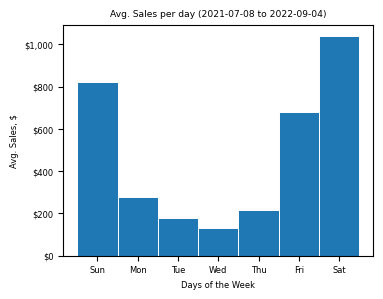

In [146]:
# Bar Graph, Avg. Gross Sales per day
_df = df.groupby(['DOW', 'Date']).agg('sum')
_l_day_of_week, _l_avg_gross_sales_per_day = [], []
_dict_DOW = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
print(f'day-of-week   days   total sales   avg. sales')
for DOW, _df_new in _df.groupby(level=0):
  _n_days = len(_df_new)
  _sum_gross_sales = _df_new['Gross Sales'].sum()
  _avg_gross_sales = _sum_gross_sales / _n_days
  # print(f'Day of Week: {DOW},   Avg Gross Sales per day: {_avg_gross_sales:>6,.0f}')
  _l_day_of_week.append(DOW)
  _l_avg_gross_sales_per_day.append(_avg_gross_sales)
  print(f'{_dict_DOW[DOW]:<11}{_n_days:>7}{_sum_gross_sales:>14,.0f}{_avg_gross_sales:>13,.0f}')

_xlabel = 'Days of the Week'
_ylabel = 'Avg. Sales' + ', $'
_title = 'Avg. Sales per day' + date_str

# data
x = _l_day_of_week
y = _l_avg_gross_sales_per_day
# y = list(np.concatenate(y).flat)  # [33628.5, 1935.0, 717.0, 795.5, 4500.0, 36615.5, 55169.0]

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
ax.set_xticks(x)
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.rcParams["figure.figsize"] = _figsize
# plt.rcParams["figure.figsize"] = [_scale * i for i in plt.rcParams["figure.figsize"]]
fmt = '${x:,.0f}'  # format number with $ and ,
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) # replace 0..6 with Sun ... Sat

plt.grid(_grid)
plt.show()

day-of-week   total sales
Sun                33,628
Mon                 1,935
Tue                   717
Wed                   796
Thu                 4,500
Fri                36,616
Sat                55,169


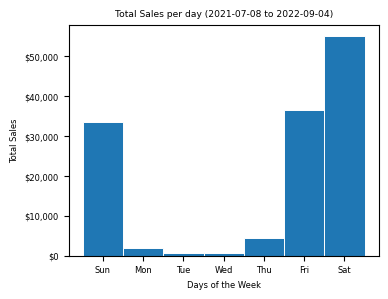

In [133]:
# Bar Graph, Gross Sales by days-of_week
_groupby_col, _agg_col = 'DOW', 'Gross Sales'
_agg_func = 'sum'
_cols = [_groupby_col, _agg_col]
_df = df[_cols]
_df = _df.groupby([_groupby_col]).agg([_agg_func])

_xlabel = 'Days of the Week'
_ylabel = 'Total Sales'
_title = 'Total Sales per day' + date_str

# data
x = _df.index
y = _df[_agg_col].values  # array([[33628.5], [ 1935. ], ..., [55169. ]])
y = list(np.concatenate(y).flat)  # [33628.5, 1935.0, 717.0, 795.5, 4500.0, 36615.5, 55169.0]

_dict_DOW = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
print(f'day-of-week   total sales')
for i in x:
  print(f'{_dict_DOW[i]:<14}{y[i]:>11,.0f}')

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
ax.set_xticks(x)
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.rcParams["figure.figsize"] = _figsize
# plt.rcParams["figure.figsize"] = [_scale * i for i in plt.rcParams["figure.figsize"]]
fmt = '${x:,.0f}'  # format number with $ and ,
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) # replace 0..6 with Sun ... Sat

plt.grid(_grid)
plt.show()

Total Sales:                   133,360
Total Transaction:               6,826
Avg. Sales per Transaction:      19.54


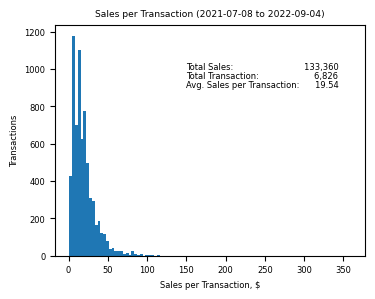

In [134]:
# Histogram, Gross Sales per Transaction
_groupby_col, _agg_col = 'Transaction ID', 'Gross Sales'
_agg_func = 'sum'

_cols = [_groupby_col, _agg_col]
_df = df[_cols]
_df = _df.groupby([_groupby_col]).agg([_agg_func])

Total_Gross_Sales = _df['Gross Sales'].sum()[0]  # get the first element in series
Total_Trans = len(_df)
Total_Trans
Avg_Sales_per_Trans = Total_Gross_Sales / Total_Trans
print(f'Total Sales:                {Total_Gross_Sales:>10,.0f}')
print(f'Total Transaction:          {Total_Trans:>10,}')
print(f'Avg. Sales per Transaction: {Avg_Sales_per_Trans:>10,.2f}')

_x = _df[_agg_col]
_bins = 100
_xlabel = 'Sales per Transaction, $'
_ylabel = 'Transactions'
_title = 'Sales per Transaction' + date_str
_density = False  # False => count, True => Area = 1 
n, bins, patches = plt.hist(_x, _bins, density=_density)
plt.rcParams.update({'font.size': _fontsize})
plt.rcParams["figure.figsize"] = _figsize
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
plt.text(150, 1000, r'Total Sales:                           133,360')
plt.text(150, 950,  r'Total Transaction:                     6,826')
plt.text(150, 900,  r'Avg. Sales per Transaction:      19.54')
# plt.xlim(0, 20)
# plt.ylim(0, 1250)

plt.grid(_grid)
plt.show()

Hour    Transactions    Total Sales    Avg. Sales per Hr.
0                  3            172                  57
1                  1             45                  45
5                  1             32                  32
6                  3            116                  39
7                  3            102                  34
8                 28          1,005                  36
9                151         54,635                 362
10               158         37,922                 240
11               148         21,482                 145
12               125         10,805                  86
13                54          2,105                  39
14                12            421                  35
15                 7            337                  48
16                 8            263                  33
17                 6            493                  82
18                 6            381                  64
19                 8            710           

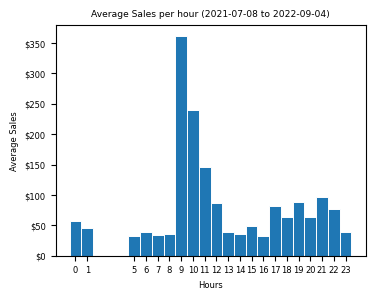

In [135]:
_df = df.sort_values(by=['Time', 'Date'])
_df.Time = pd.to_datetime(_df.Time)
_df = _df.groupby([_df['Time'].dt.hour, 'Date']).agg(sum)

print('Hour    Transactions    Total Sales    Avg. Sales per Hr.')
_l_hr = []
_l_trans = []
_l_sales = []
_l_avg_sale = []
for Time, _df1 in _df.groupby(level=0):
  _hour = Time
  _transactions = len(_df1)
  _total_sales = _df1["Gross Sales"].agg(sum)
  _avg_sales_per_hr = _total_sales / _transactions
  _l_hr.append(_hour)
  _l_trans.append(_transactions)
  _l_sales.append(_total_sales)
  _l_avg_sale.append(_avg_sales_per_hr)
  print(f'{Time:<4}    {_transactions:>12,.0f}    {_total_sales:>11,.0f}    {_avg_sales_per_hr:>16,.0f}')


_xlabel = 'Hours'
_ylabel = 'Average Sales'
_title = 'Average Sales per hour' + date_str
# data
x = _l_hr
y = _l_avg_sale
# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
ax.set_xticks(x)
# ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.rcParams["figure.figsize"] = _figsize
# plt.rcParams["figure.figsize"] = [_scale * i for i in plt.rcParams["figure.figsize"]]
fmt = '${x:,.0f}'  # format number with $ and ,
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) # replace 0..6 with Sun ... Sat
plt.grid(_grid)
plt.show()

In [136]:
df

,Date,Time,Category,Item,Qty,Gross Sales,Discounts,Net Sales,Tax,...,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT08,DOW
0,2021-07-08,17:31:07,Food,Chocolate Croissant,1.0,6.0,0.0,6.0,0.00,...,1.34,0.0,76.0,84,68,NaN,NaN,NaN,4
1,2021-07-08,17:31:29,Food,Jarred Pastry,1.0,6.0,0.0,6.0,0.00,...,1.34,0.0,76.0,84,68,NaN,NaN,NaN,4
2,2021-07-08,17:31:47,Beverage,Sparkling,1.0,3.0,0.0,3.0,0.28,...,1.34,0.0,76.0,84,68,NaN,NaN,NaN,4
6,2021-07-09,09:14:03,Food,Croissant,2.0,10.0,0.0,10.0,0.00,...,1.12,0.0,77.0,86,68,NaN,NaN,NaN,5
7,2021-07-09,09:14:03,Food,Chocolate Croissant,2.0,12.0,0.0,12.0,0.00,...,1.12,0.0,77.0,86,68,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18359,2022-09-04,11:19:02,Food,Cinnamon Knot,1.0,3.0,0.0,3.0,0.00,...,1.12,0.0,90.0,103,77,NaN,NaN,NaN,0
18360,2022-09-04,11:20:38,Food,Oatmeal Cookie,1.0,4.0,0.0,4.0,0.00,...,1.12,0.0,90.0,103,77,NaN,NaN,NaN,0
18361,2022-09-04,11:21:25,Food,Cinnamon Knot,1.0,3.0,0.0,3.0,0.00,...,1.12,0.0,90.0,103,77,NaN,NaN,NaN,0
18362,2022-09-04,11:32:24,Food,Cinnamon Knot,1.0,3.0,0.0,3.0,0.00,...,1.12,0.0,90.0,103,77,NaN,NaN,NaN,0


In [137]:
df1 = df[['DOW', 'TAVG', 'Date', 'Gross Sales']]
df2 = df1.groupby(['DOW', 'TAVG']).agg({'Date':['nunique'], 'Gross Sales':['sum']})
l_sales = df2.loc[(slice(None), 'Gross Sales')].values
l_date = df2.loc[(slice(None), 'Date')].values
l_sales.flatten()
l_date.flatten()
l_sales_per_day = l_sales / l_date
# print(l_sales[-5:], '\n')
# print(l_date[-5:], '\n')
# print(l_sales_per_day[-5:], '\n')
df2['Avg Sales'] = l_sales_per_day
df2.columns = df2.columns.droplevel(1)
df2 = df2.rename({'Date': 'Unique Date'}, axis=1)
df2 = df2[['Avg Sales']]
df2 = df2.reset_index()
ct = pd.crosstab(
        df2['DOW'], 
        df2['TAVG'], 
        values = df2['Avg Sales'],
        aggfunc = 'mean'
    ).round(0)
ct  # crosstab of days-of-week vs avg.-temp.

TAVG,48.0,49.0,51.5,52.0,53.0,53.5,54.0,54.5,55.5,...,77.0,77.5,78.0,78.5,79.5,84.0,85.0,86.5,90.0
DOW,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,866.0,NaN,1092.0,NaN,NaN,NaN,...,814.0,726.0,626.0,NaN,NaN,NaN,NaN,NaN,668.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,654.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,65.0,NaN,NaN,NaN,NaN,64.0,NaN,NaN
5,NaN,NaN,599.0,992.0,NaN,NaN,638.0,NaN,1044.0,...,859.0,NaN,NaN,NaN,618.0,400.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,999.0,943.0,NaN,1162.0,1130.0,...,1205.0,884.0,NaN,837.0,NaN,NaN,NaN,589.0,NaN


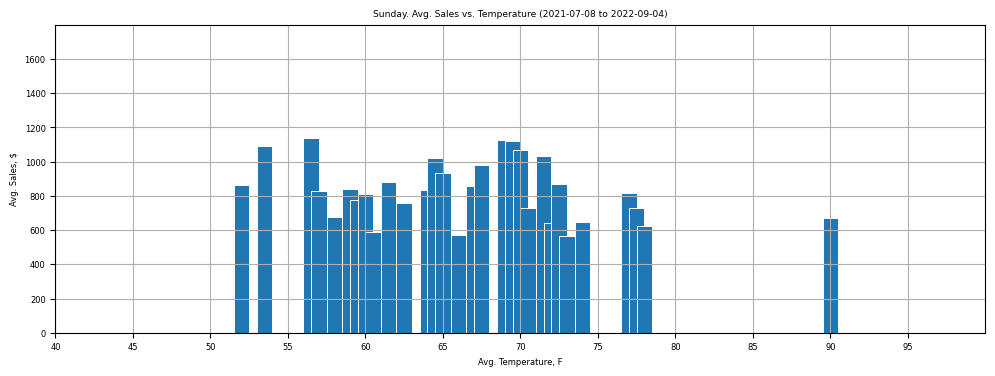

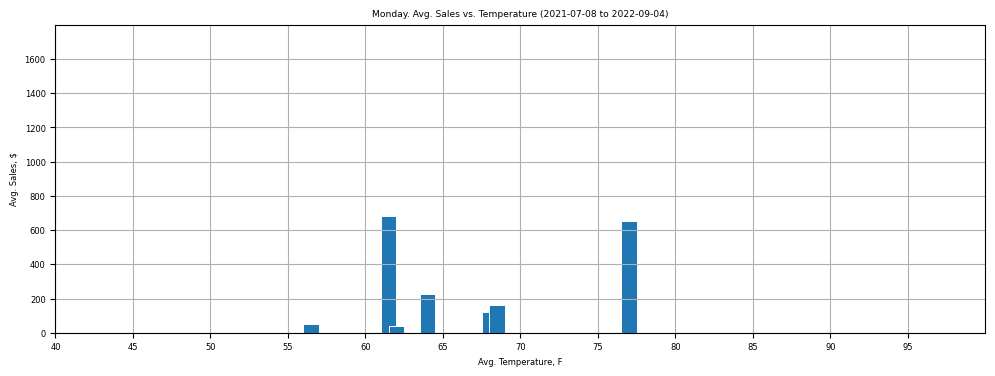

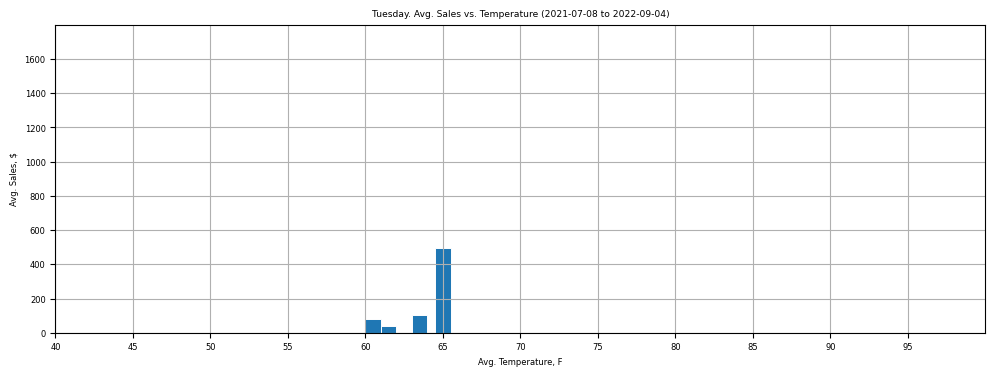

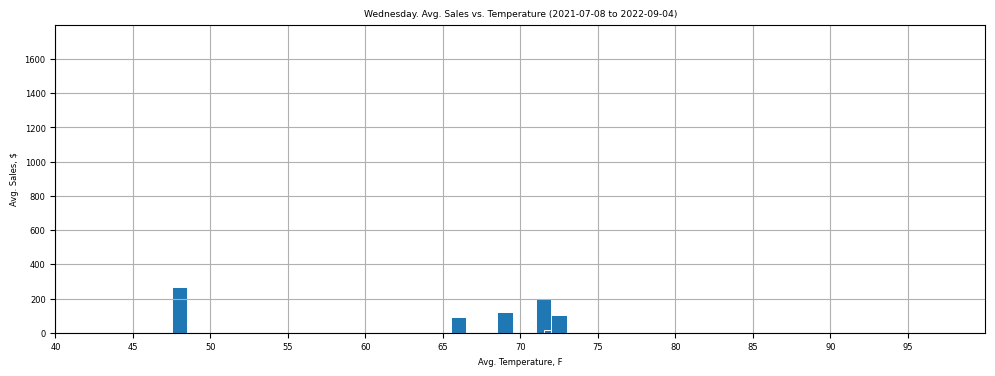

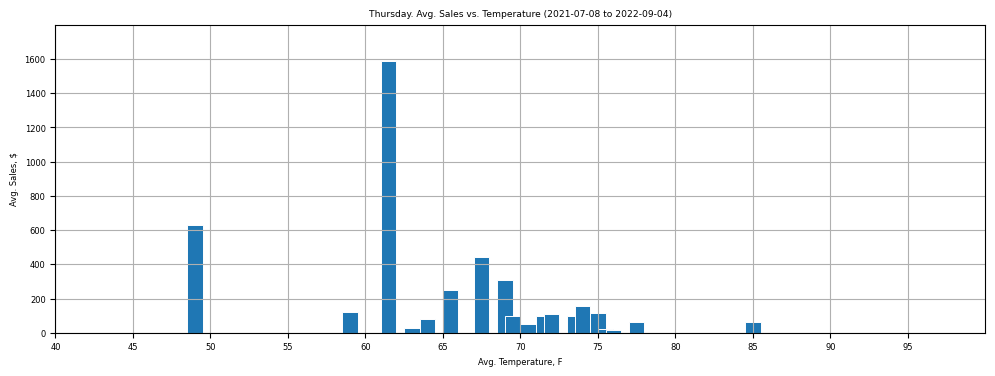

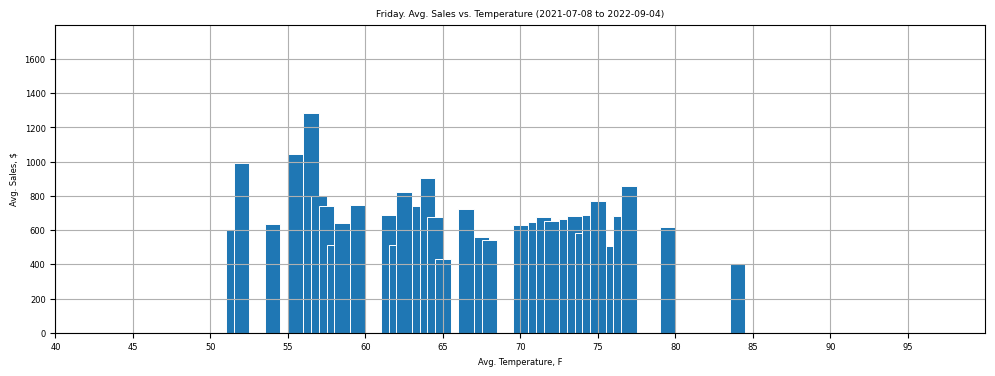

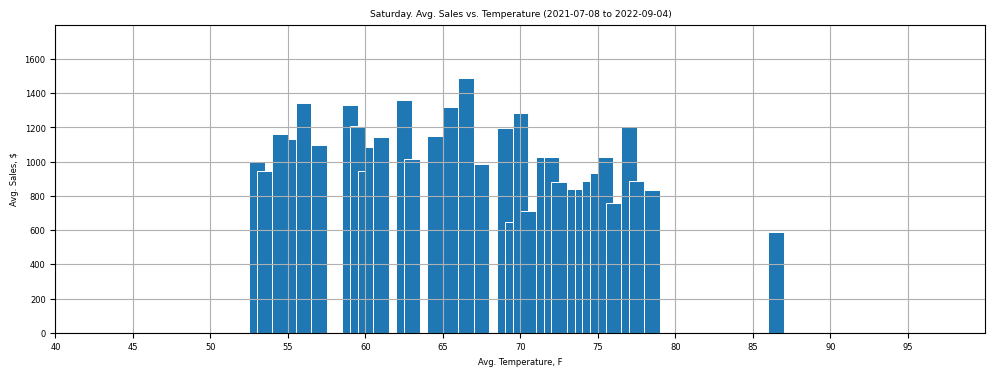

In [148]:
# Bar Graph, Gross Sales by days-of_week
for _DOW in ct.index:
  temp = ct.loc[_DOW].index
  # ct.loc[0].values.fillna(0)
  avg_sales = np.nan_to_num(ct.loc[_DOW].values, copy=True, nan=0.0, posinf=None, neginf=None)

# _dict_DOW = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
  _dict_DOW = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

  _xlabel = 'Avg. Temperature, F'
  _ylabel = f'Avg. Sales, $'
  _title = f'{_dict_DOW[_DOW]}. Avg. Sales vs. Temperature' + date_str

  # data
  x = temp
  y = avg_sales

  # plot
  fig, ax = plt.subplots()
  ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
  ax.set(xlim=(40, 100), xticks=np.arange(40, 100, 5),
         ylim=(0, 1800), yticks=np.arange(0, 1800, 200))
  plt.xlabel(_xlabel)
  plt.ylabel(_ylabel)
  plt.title(_title, fontsize = _fontsize*_titlescale)
  # ax.set_xticks(x)
  # ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
  plt.rcParams["figure.figsize"] = (12, 4)

  # plt.xlim(50, 90)
  plt.grid(True)
  plt.show()

In [139]:
# ********** FILTER ********** selecting rows based on condition 
df_f = df[(df['DOW'] == 4) & (df['TAVG'] > 60) & (df['TAVG'] < 65)] 
df_f.head()

,Date,Time,Category,Item,Qty,Gross Sales,Discounts,Net Sales,Tax,...,AWND,PRCP,TAVG,TMAX,TMIN,WT01,WT02,WT08,DOW
5236,2021-11-04,14:01:02,Food,Pumpkin Pie Preorder,1.0,40.0,0.0,40.0,3.8,...,0.89,0.0,64.0,71,57,1.0,1.0,1.0,4
5237,2021-11-04,14:01:02,Food,Apple Pie Preorder,1.0,40.0,0.0,40.0,3.8,...,0.89,0.0,64.0,71,57,1.0,1.0,1.0,4
6292,2021-11-25,09:05:15,Food,Coffee Cake,1.0,5.0,0.0,5.0,0.0,...,0.22,0.0,61.5,76,47,NaN,NaN,NaN,4
6293,2021-11-25,09:05:15,Food,Croissant,2.0,10.0,0.0,10.0,0.0,...,0.22,0.0,61.5,76,47,NaN,NaN,NaN,4
6294,2021-11-25,09:05:15,Food,Cinnamon Knot,2.0,4.0,0.0,4.0,0.0,...,0.22,0.0,61.5,76,47,NaN,NaN,NaN,4


In [140]:
# ********** GROUPBY ********** 
df_f1 = df_f.groupby(['Date']).agg({'Date':['nunique'], 'Gross Sales':['sum']})
df_f1
df_f1.columns = df_f1.columns.droplevel(1)
df_f1

,Date,Gross Sales
Date,,
2021-11-04,1,80.0
2021-11-25,1,1588.0
2022-05-19,1,30.0


In [141]:
df_d = df[['Date', 'Gross Sales']]
df_d = df_d.groupby(['Date']).agg({'Gross Sales':['sum']})
df_d.tail()
df_d.columns = df_d.columns.droplevel(1)
df_d.tail()
# Converting the index as date
df_d.index = pd.to_datetime(df_d.index)
df_d.info()
print(df_d.head())
print(df_d.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2021-07-08 to 2022-09-04
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gross Sales  186 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB
            Gross Sales
Date                   
2021-07-08         15.0
2021-07-09        859.0
2021-07-10       1205.0
2021-07-16        847.0
2021-07-17       1026.0
            Gross Sales
Date                   
2022-08-21        935.5
2022-09-01         64.0
2022-09-02        400.0
2022-09-03        589.0
2022-09-04        668.0


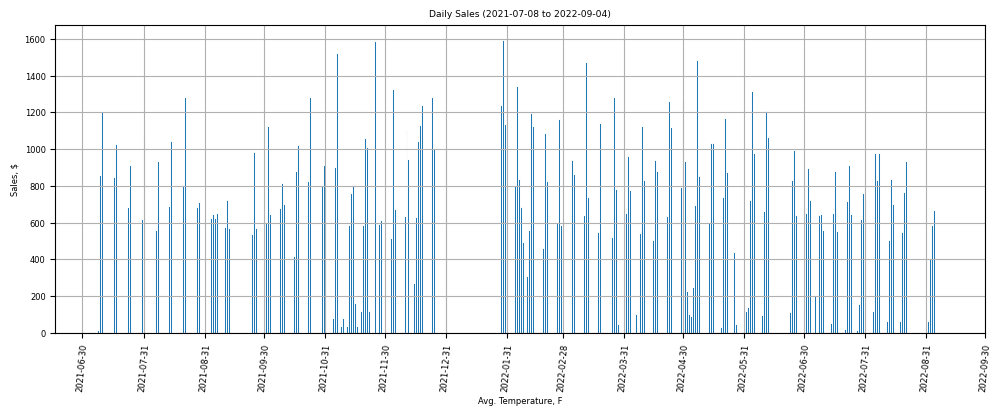

In [142]:
# _xlabel = 'Date'
_ylabel = f'Sales, $'
_title = f'Daily Sales' + date_str

# data
x = df_d.index
y = df_d['Gross Sales']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
# ax.set(xlim=(40, 100), xticks=np.arange(40, 100, 5),
#        ylim=(0, 1800), yticks=np.arange(0, 1800, 200))
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)


# x_tick = ax.xaxis.set_major_locator(x.MonthLocator(interval=1))
x_tick = pd.date_range('2021-06-01', '2022-10-01', freq='M')
ax.set_xticks(x_tick)
plt.xticks(rotation = 85)

# ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.rcParams["figure.figsize"] = (12, 4)

# plt.xlim(50, 90)
plt.grid(True)
plt.show()

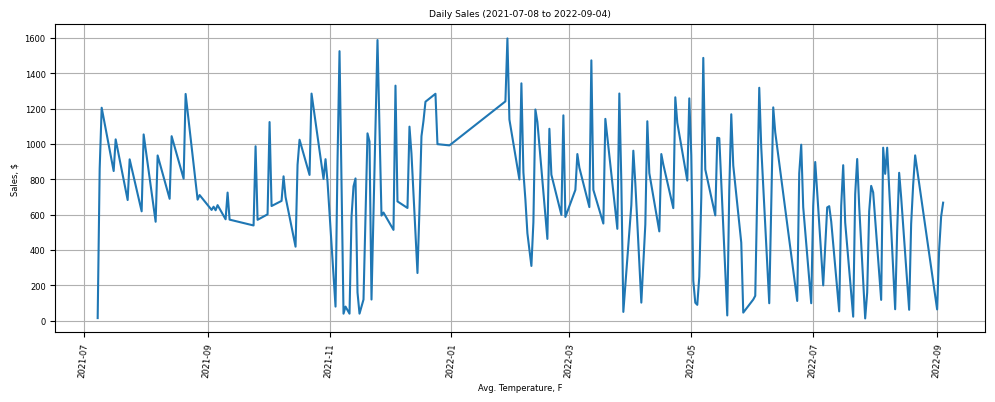

In [143]:
# _xlabel = 'Date'
_ylabel = f'Sales, $'
_title = f'Daily Sales' + date_str

# data
x = df_d.index
y = df_d['Gross Sales']

# plot
plt.plot(x, y)
# fig, ax = plt.subplots()
# ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
# ax.set(xlim=(40, 100), xticks=np.arange(40, 100, 5),
#        ylim=(0, 1800), yticks=np.arange(0, 1800, 200))
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
# ax.set_xticks(x)
# ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

x_tick = pd.date_range('2021-06-01', '2022-10-01', freq='M')
ax.set_xticks(x_tick)
plt.xticks(rotation = 85)

plt.rcParams["figure.figsize"] = (12, 4)

# plt.xlim(50, 90)
plt.grid(True)
plt.show()